In [ ]:
!pip install tensorflow opencv-python matplotlib

Importing Tensor FLow And Setting Up GPU

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Importing Images And Sorting

In [12]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(imagepath)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in Path {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

Issue with the image data\flowers\10-ranunculus.png
Issue with the image data\flowers\1000_F_572687498_PooHSUlOfzlyPCYgt4ddW5pOnklS94iD.jpg
Issue with the image data\flowers\1200px-Bachelor-s_button-_Basket_flower-_Boutonniere_flower-.jpg
Issue with the image data\flowers\1h7a7246-edit.jpg
Issue with the image data\flowers\2.png
Issue with the image data\flowers\253800744_1_Ashley__Harbison__BNB_BYPC2020.jpg
Issue with the image data\flowers\2ecf067a2069128f44d75d25a32e219e.jpg
Issue with the image data\flowers\330px-Flower_poster_2.jpg
Issue with the image data\flowers\65890a233344f1816429ec35_National-Flower-Day.jpeg
Issue with the image data\flowers\6915BD07-F3C4-4E5E-AFF8-E862BD6DE365.jpeg
Issue with the image data\flowers\6DGTAL5UC1yioEq6-XfBvLPPy2SDHtF7fo4-cq-91w-9uYdEaWMCaKnsT5gw.jpeg
Issue with the image data\flowers\8078-chive-flowers-edible.jpg
Issue with the image data\flowers\9d-finished-Step-by-step-Periwinkle-botanical-illustration-b.jpg
Issue with the image data\flowers\

Making the Data Pipeline

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
#Kinda Like a Pipeline to feed in data, has a batch size of 32
data = tf.keras.utils.image_dataset_from_directory('data')

Found 190 files belonging to 2 classes.


In [27]:
#Helps us iterate over the data
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

In [29]:
#Images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [30]:
# Class 1 = Trees
# Class 0 = FLowers
batch[1]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

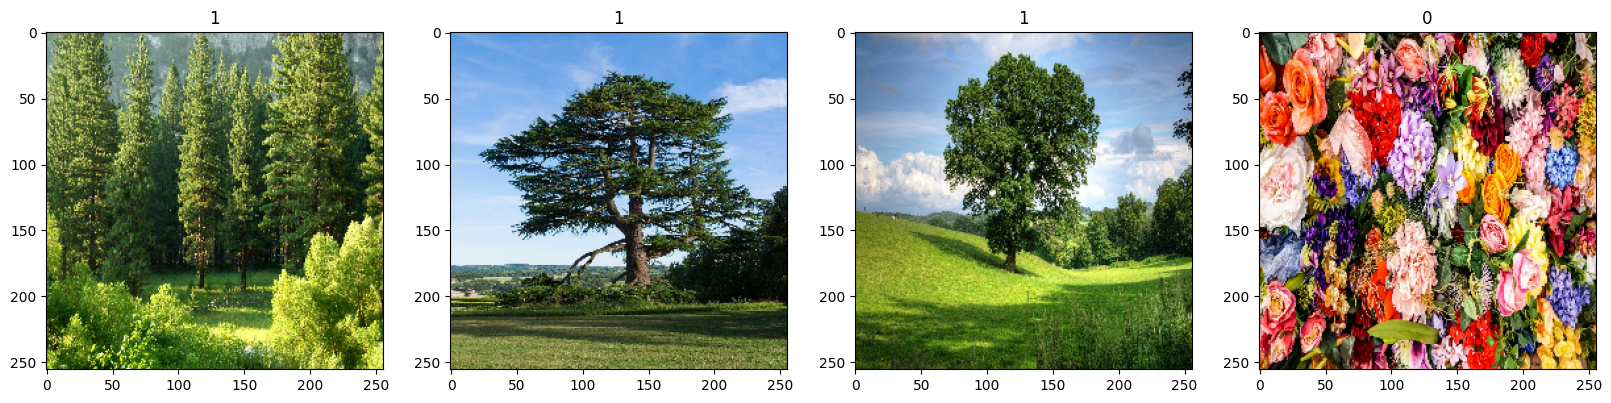

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

PreProcessing the Data


0-1 is much better than 0-255 so we just map it

In [33]:
data = data.map(lambda x,y: (x/255, y))

In [35]:
scaled_iterator = data.as_numpy_iterator().next()

In [37]:
scaled_iterator[0].min()

np.float32(0.0)

In [43]:
len(data)

6

Training The Model

In [56]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2 )
test_size = int(len(data) * .1) + 1

In [57]:
train_size + val_size + test_size

6

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [61]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [64]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
logdir = 'logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [68]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4635 - loss: 2.1413 - val_accuracy: 0.4688 - val_loss: 0.8465
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 932ms/step - accuracy: 0.4760 - loss: 0.7942 - val_accuracy: 0.4688 - val_loss: 0.6944
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6667 - loss: 0.6804 - val_accuracy: 0.4375 - val_loss: 0.6942
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5448 - loss: 0.6504 - val_accuracy: 0.8438 - val_loss: 0.6152
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8760 - loss: 0.5958 - val_accuracy: 0.8438 - val_loss: 0.4119
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 999ms/step - accuracy: 0.7542 - loss: 0.4975 - val_accuracy: 0.6250 - val_loss: 0.5765
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 827ms/step - accuracy: 0.6344 - loss: 0.6700 - val_accuracy: 0.7812 - val_loss: 0.5246
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 893ms/step - accuracy: 0.8635 - loss: 0.4042 - val_accuracy: 0.9375 - val_loss: 0.2868
Epoc

In [70]:
hist.history

{'accuracy': [0.5,
  0.515625,
  0.640625,
  0.53125,
  0.875,
  0.7421875,
  0.7109375,
  0.8828125,
  0.921875,
  0.8828125,
  0.9296875,
  0.8828125,
  0.8828125,
  0.9375,
  0.8984375,
  0.953125,
  0.96875,
  0.96875,
  0.984375,
  0.9609375],
 'loss': [2.1528103351593018,
  0.7509635090827942,
  0.6796637773513794,
  0.6549392938613892,
  0.5868388414382935,
  0.5210278630256653,
  0.5985449552536011,
  0.37205052375793457,
  0.287638396024704,
  0.2827933728694916,
  0.27554869651794434,
  0.25779297947883606,
  0.2811499834060669,
  0.2071678340435028,
  0.2297762632369995,
  0.17412826418876648,
  0.11405954509973526,
  0.11208699643611908,
  0.08423405885696411,
  0.14354494214057922],
 'val_accuracy': [0.46875,
  0.46875,
  0.4375,
  0.84375,
  0.84375,
  0.625,
  0.78125,
  0.9375,
  0.78125,
  0.9375,
  0.875,
  0.84375,
  0.875,
  1.0,
  1.0,
  0.9375,
  0.9375,
  0.96875,
  0.96875,
  1.0],
 'val_loss': [0.8465239405632019,
  0.6944253444671631,
  0.6942331194877625,
  0

Plotting the Progress

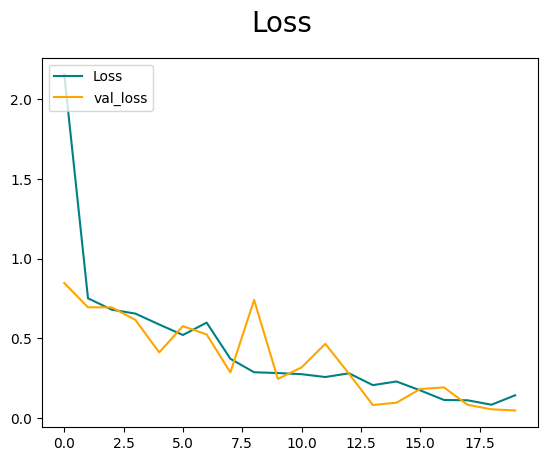

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'Loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

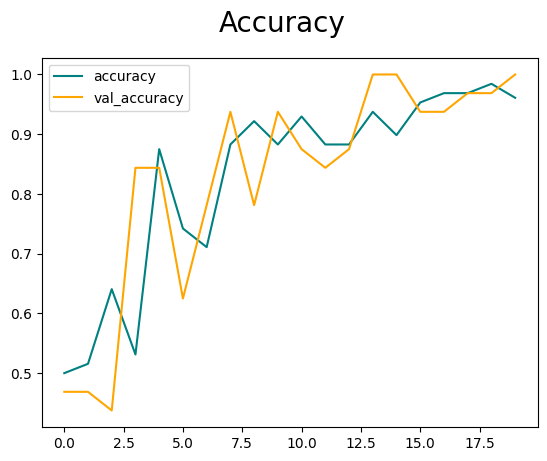

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Measure Accuracy Of The Model

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy() 

In [76]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [78]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9166666865348816, Accuracy: 0.9666666388511658


Testing Model

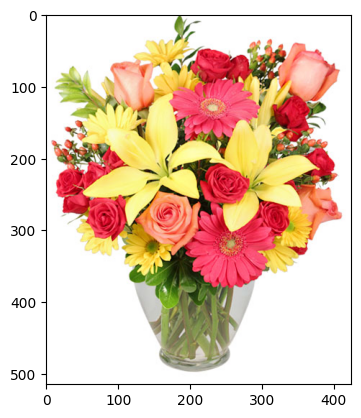

In [103]:
img = cv2.imread('flowertest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

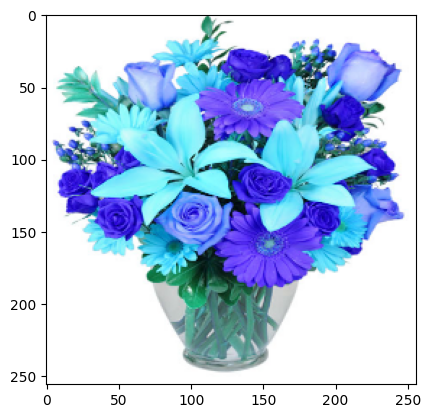

In [104]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
resize.shape

TensorShape([256, 256, 3])

In [106]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [108]:
yhat

array([[0.1996018]], dtype=float32)

In [109]:
if yhat > 0.5: 
    print(f'Predicted class is Tree')
else:
    print(f'Predicted class is Flower')

Predicted class is Flower


Save the Model

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join('models', 'treeflowermodel.kera'))

In [113]:
new_model = load_model(os.path.join('models', 'treeflowermodel.keras'))

In [114]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [115]:
if yhatnew > 0.5: 
    print(f'Predicted class is Tree')
else:
    print(f'Predicted class is Flower')

Predicted class is Flower
